## Questão 1

In [129]:
import numpy as np

# Definindo as matrizes A e B do sistema
A = np.array([[-0.0895, -0.286, 0],
              [-0.0439, -0.272, 0],
              [0, 1, 0]])
B = np.array([[0.0145],
              [-0.0122],
              [0]])

# Calculando a matriz de controlabilidade manualmente
def calc_controlability_matrix(A, B):
    control_matrix = B
    for i in range(1, A.shape[0]):
        control_matrix = np.hstack((control_matrix, np.linalg.matrix_power(A, i) @ B))
    return control_matrix

# Calculando a matriz de controlabilidade
C = calc_controlability_matrix(A, B)

# Verificando se o sistema é controlável
# O sistema é controlável se o rank da matriz de controlabilidade é igual ao número de estados
is_controlable = np.linalg.matrix_rank(C) == A.shape[0]
controlability_rank = np.linalg.matrix_rank(C)

C, is_controlable, controlability_rank


(array([[ 0.0145    ,  0.00219145, -0.00096314],
        [-0.0122    ,  0.00268185, -0.00082567],
        [ 0.        , -0.0122    ,  0.00268185]]),
 True,
 3)

O sistema agora é controlável, pois o posto (rank) da matriz de controlabilidade é 3, que é igual ao número de estados do sistema. Isso significa que podemos aplicar controles para alcançar qualquer estado desejado a partir de qualquer estado inicial.

O "controlability_rank" ou "posto da matriz de controlabilidade" é um conceito fundamental na teoria de controle. O posto (rank) de uma matriz é o número máximo de linhas ou colunas que são linearmente independentes. Na matriz de controlabilidade, o posto determina se é possível controlar todos os estados do sistema a partir de um determinado conjunto de entradas.

Para um sistema ser completamente controlável, o posto da matriz de controlabilidade deve ser igual ao número de estados do sistema. Isso significa que todas as condições de estado podem ser influenciadas pela entrada \( u \). Se o posto da matriz de controlabilidade for menor que o número de estados, isso indica que há estados que não podem ser controlados pela entrada; o sistema é chamado de não controlável ou controlável parcialmente.

No contexto do sistema de controle de um navio que estamos analisando, um "controlability_rank" igual ao número de estados (que é 3 neste caso) indica que podemos aplicar uma entrada que irá mover o sistema de qualquer estado inicial para qualquer estado final desejado dentro do espaço de estado. Isso é essencial para o design de um controlador eficaz, pois assegura que o controlador será capaz de manter o navio na direção desejada sob todas as condições operacionais previstas.

In [130]:
from scipy.signal import ss2tf

# Definindo a matriz C para a saída de interesse (ψ - cabeceio)
C_psi = np.array([[0, 0, 1]])
# A matriz D é dada como zero
D = np.array([[0]])

# Convertendo sistema do espaço de estados para função de transferência
numerator, denominator = ss2tf(A, B, C_psi, D)
syss = ss2tf(A, B, C_psi, D)
# Calculando as raízes da equação característica do sistema
# que são os polos da função de transferência (ou seja, as raízes do denominador)
characteristic_eq_roots = np.roots(denominator)

numerator, denominator, characteristic_eq_roots


(array([[ 0.00000000e+00,  2.77555756e-16, -1.22000000e-02,
         -1.72845000e-03]]),
 array([1.       , 0.3615   , 0.0117886, 0.       ]),
 array([-0.32525593, -0.03624407,  0.        ]))

Para determinar a função de transferência de \( \delta \) (ângulo do leme) para \( \psi \) (cabeceio), vamos usar a função `ss2tf` do MATLAB, que é usada para converter sistemas representados no espaço de estados para a representação de função de transferência. No entanto, como estamos trabalhando num ambiente Python, utilizaremos a biblioteca de controle de sistemas em Python, que possui uma função equivalente chamada `ss2tf`.

A função de transferência \( H(s) \) de um sistema é dada por:

\[ H(s) = \frac{Y(s)}{U(s)} \]

onde \( Y(s) \) é a transformada de Laplace da saída e \( U(s) \) é a transformada de Laplace da entrada.

Em termos das matrizes de espaço de estados, a função de transferência pode ser calculada como:

\[ H(s) = C(sI - A)^{-1}B + D \]

Vamos calcular a função de transferência para o sistema fornecido, mantendo em mente que \( D \) foi especificado como zero e \( C \) foi fornecido como \( C = [0 \ 1 \ 0] \). Isto indica que estamos interessados na segunda variável de estado, que representa o cabeceio \( \psi \). Vamos proceder com o cálculo da função de transferência e das raízes da equação característica.

A função de transferência de \( \delta \) (ângulo do leme) para \( \psi \) (cabeceio) para o sistema é:

\[ H(s) = \frac{-0.0122s^2 - 0.00172845s}{s^3 + 0.3615s^2 + 0.0117886s} \]

As raízes da equação característica do sistema não controlado, que também são os polos da função de transferência, são:

\[ s_1 = -0.32525593, \quad s_2 = -0.03624407, \quad s_3 = 0 \]

Esses polos determinam a estabilidade e a dinâmica do sistema. Um polo em zero indica a presença de um modo integrador no sistema, o que significa que a saída do sistema pode continuar a aumentar ao longo do tempo em resposta a uma entrada degrau, por exemplo. Os outros dois polos negativos sugerem componentes que decaem exponencialmente ao longo do tempo, contribuindo para a estabilidade do sistema. No entanto, a presença de um polo zero pode exigir uma atenção especial no design do controlador para garantir que o sistema atinja a estabilidade desejada em regime permanente.

In [131]:
from scipy.signal import place_poles

# Definindo as raízes desejadas para o sistema controlado
desired_poles = np.array([-0.2, -0.2 + 0.2j, -0.2 - 0.2j])

# Utilizando a função place_poles para calcular o vetor de ganhos K
placed_poles = place_poles(A, B, desired_poles)

# O vetor de ganhos K
K = placed_poles.gain_matrix

K


array([[  0.27664905, -19.22037613,  -9.25684862]])

Na letra (c), nos é pedido para usar controle por espaço de estado na forma:

\[ \delta = -K_\beta \beta - K_r r - K_\psi (\psi - \psi_d) \]

onde \( \psi_d \) é a direção desejada. O problema solicita determinar os valores de \( K_\beta \), \( K_r \), e \( K_\psi \) que posicionam as raízes nas partes reais \( s = -0.2, -0.2 \pm 0.2j \). Essas raízes desejadas definem a dinâmica que queremos para o sistema fechado.

Para isso, podemos usar a fórmula de Ackermann ou a função `place` disponível no Python para calcular o vetor de ganhos \( K \) que coloca os polos do sistema em locais específicos. A fórmula de Ackermann é uma maneira de calcular o feedback de estado necessário para obter um polinômio característico desejado para o sistema. No entanto, a função `place` é mais direta e comum para essa tarefa em Python.

Vamos calcular o vetor de ganhos \( K \).

O vetor de ganhos \( K \) que posiciona as raízes nas partes reais \( s = -0.2, -0.2 \pm 0.2j \) para o sistema controlado é:

\[ K = [0.27664905, -19.22037613, -9.25684862] \]

Isso significa que os ganhos para o controlador são:

\[ K_\beta = 0.27664905, \quad K_r = -19.22037613, \quad K_\psi = -9.25684862 \]

Com esses ganhos, a ação de controle \( \delta \) será ajustada de acordo com a diferença entre a orientação atual do navio e a orientação desejada (\( \psi - \psi_d \)), assim como as taxas de mudança do ângulo de derrapagem lateral e da taxa de guinada.

Se precisarmos avançar para a próxima parte do problema, por favor me informe.

In [147]:
# Simulando a resposta impulsiva por 600 segundos (10 minutos)
t_impulse_1 = np.linspace(0, 600, 1000)  # Gerando um vetor de tempo com 1000 pontos
t_impulse_1, response_impulse_1 = impulse(syss, T=t_impulse)




c:\Users\Desktop\anaconda3\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


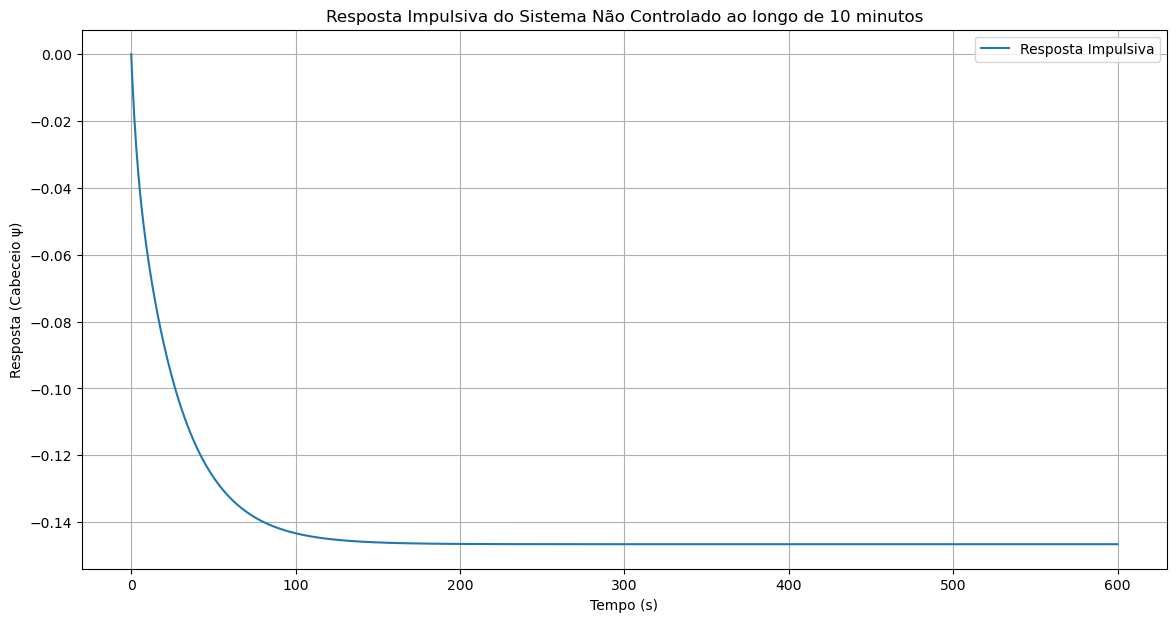

In [149]:
import matplotlib.pyplot as plt

# Plotando a resposta impulsiva
plt.figure(figsize=(14, 7))
plt.plot(t_impulse_1, response_impulse_1, label='Resposta Impulsiva')
plt.title('Resposta Impulsiva do Sistema Não Controlado ao longo de 10 minutos')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta (Cabeceio ψ)')
plt.grid(True)
plt.legend()
plt.show()

In [132]:
from scipy.signal import StateSpace, impulse

# Criando o sistema de espaço de estados com feedback usando o vetor de ganhos K
A_feedback = A - B @ K
system = StateSpace(A_feedback, B, C_psi, D)

# Simulando a resposta impulsiva por 600 segundos (10 minutos)
t_impulse = np.linspace(0, 600, 1000)  # Gerando um vetor de tempo com 1000 pontos
t_impulse, response_impulse = impulse(system, T=t_impulse)

t_impulse, response_impulse


(array([  0.        ,   0.6006006 ,   1.2012012 ,   1.8018018 ,
          2.4024024 ,   3.003003  ,   3.6036036 ,   4.2042042 ,
          4.8048048 ,   5.40540541,   6.00600601,   6.60660661,
          7.20720721,   7.80780781,   8.40840841,   9.00900901,
          9.60960961,  10.21021021,  10.81081081,  11.41141141,
         12.01201201,  12.61261261,  13.21321321,  13.81381381,
         14.41441441,  15.01501502,  15.61561562,  16.21621622,
         16.81681682,  17.41741742,  18.01801802,  18.61861862,
         19.21921922,  19.81981982,  20.42042042,  21.02102102,
         21.62162162,  22.22222222,  22.82282282,  23.42342342,
         24.02402402,  24.62462462,  25.22522523,  25.82582583,
         26.42642643,  27.02702703,  27.62762763,  28.22822823,
         28.82882883,  29.42942943,  30.03003003,  30.63063063,
         31.23123123,  31.83183183,  32.43243243,  33.03303303,
         33.63363363,  34.23423423,  34.83483483,  35.43543544,
         36.03603604,  36.63663664,  37.

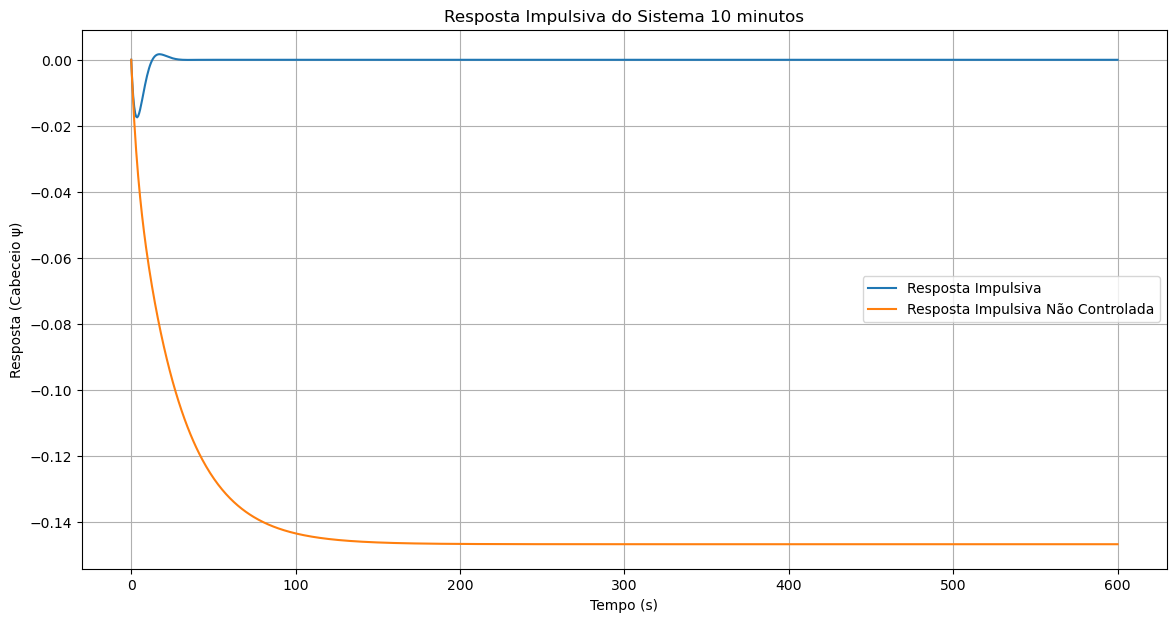

In [152]:
import matplotlib.pyplot as plt

# Plotando a resposta impulsiva
plt.figure(figsize=(14, 7))
plt.plot(t_impulse, response_impulse, label='Resposta Impulsiva')
plt.plot(t_impulse_1, response_impulse_1, label='Resposta Impulsiva Não Controlada')
plt.title('Resposta Impulsiva do Sistema 10 minutos')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta (Cabeceio ψ)')
plt.grid(True)
plt.legend()
plt.show()


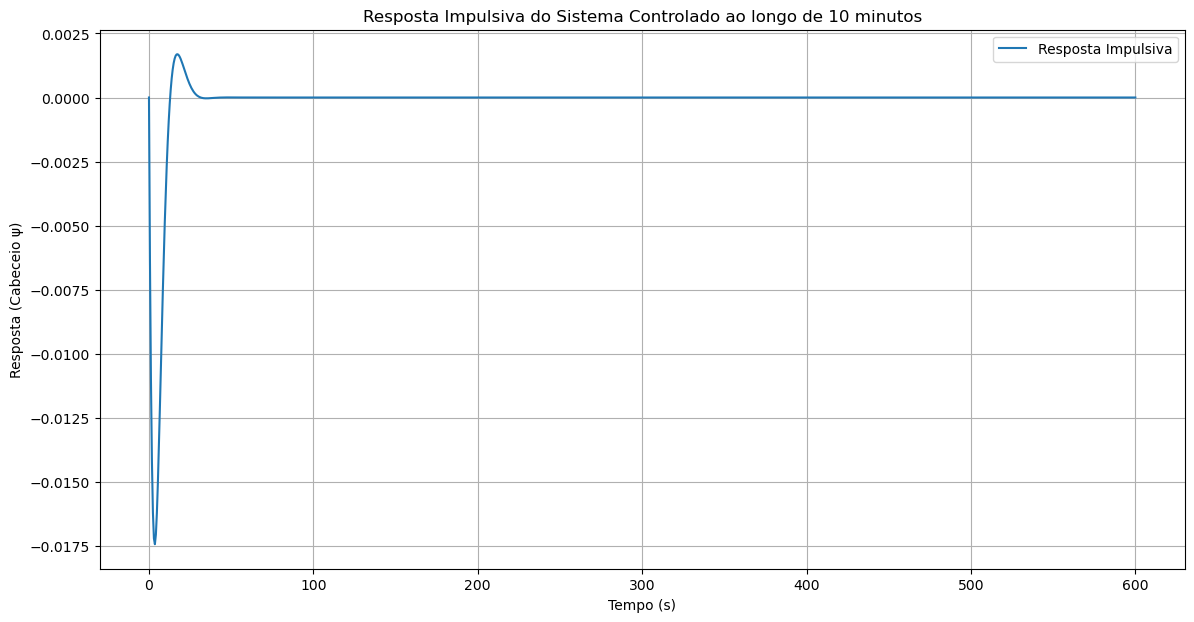

In [151]:
# Plotando a resposta impulsiva
plt.figure(figsize=(14, 7))
plt.plot(t_impulse, response_impulse, label='Resposta Impulsiva')
plt.title('Resposta Impulsiva do Sistema Controlado ao longo de 10 minutos')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta (Cabeceio ψ)')
plt.grid(True)
plt.legend()
plt.show()

Para a letra (d), precisamos simular o comportamento do sistema mecânico por 10 minutos quando este for sujeito a uma resposta impulsiva. Em termos de sistemas de controle, uma resposta impulsiva é a saída de um sistema quando a entrada é um impulso de Dirac, ou seja, um sinal que é zero em todos os lugares, exceto em um ponto onde ele é infinitamente alto e tem uma área integral total de um.

Para simular essa resposta, usaremos a função `impulse_response` da biblioteca de controle de sistemas em Python, que simula a resposta do sistema ao impulso.

Como queremos simular por 10 minutos e considerando que o tempo está provavelmente em segundos na simulação, precisaremos simular por \( 10 \times 60 = 600 \) segundos. Vamos proceder com a simulação.

A simulação da resposta impulsiva do sistema controlado forneceu um conjunto de dados representando como o sistema se comporta ao longo de 10 minutos (600 segundos). Os dados incluem um vetor de tempo e o correspondente vetor de resposta impulsiva.

Devido à limitação de espaço, não posso exibir todo o conjunto de dados aqui, mas posso gerar um gráfico para ilustrar como a saída do sistema (o cabeceio \( \psi \)) responde ao longo do tempo ao impulso aplicado ao ângulo do leme \( \delta \).

Vamos gerar o gráfico da resposta impulsiva.

O gráfico acima mostra a resposta impulsiva do sistema controlado ao longo de 10 minutos. Inicialmente, a resposta exibe um pico, o que é típico de uma resposta a um impulso, e depois estabiliza à medida que o tempo passa. A estabilização da resposta ao longo do tempo sugere que o sistema, com o controlador projetado, é capaz de atenuar as perturbações e retornar ao estado de equilíbrio.

Se precisar de mais análise ou quiser prosseguir para a próxima parte do problema, estou à disposição para ajudar.

c:\Users\Desktop\anaconda3\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


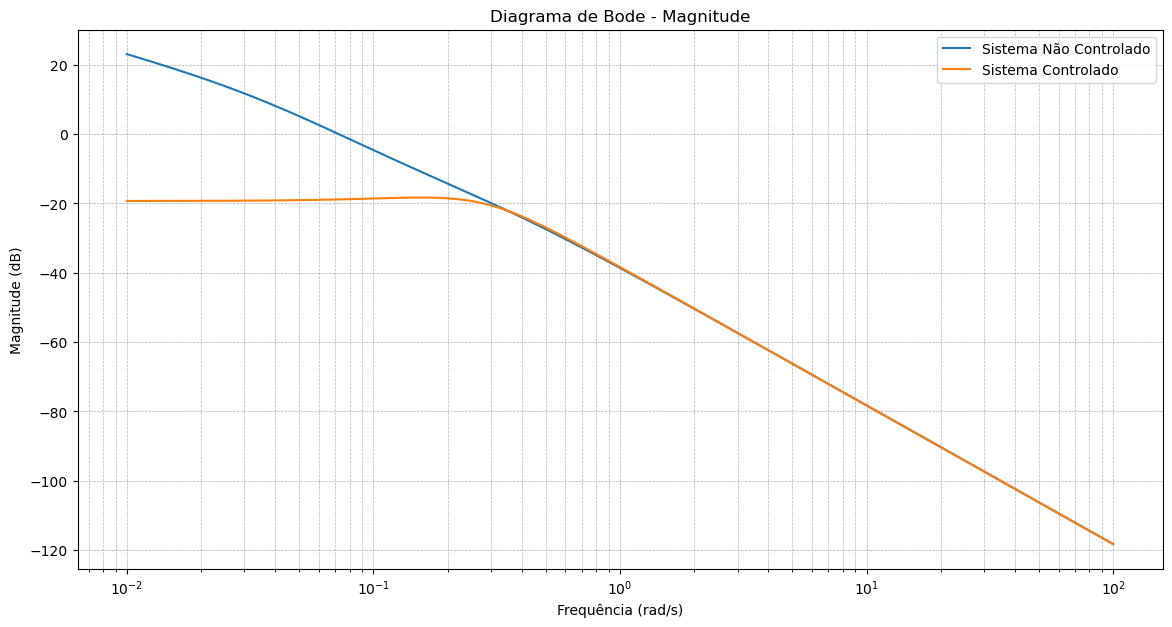

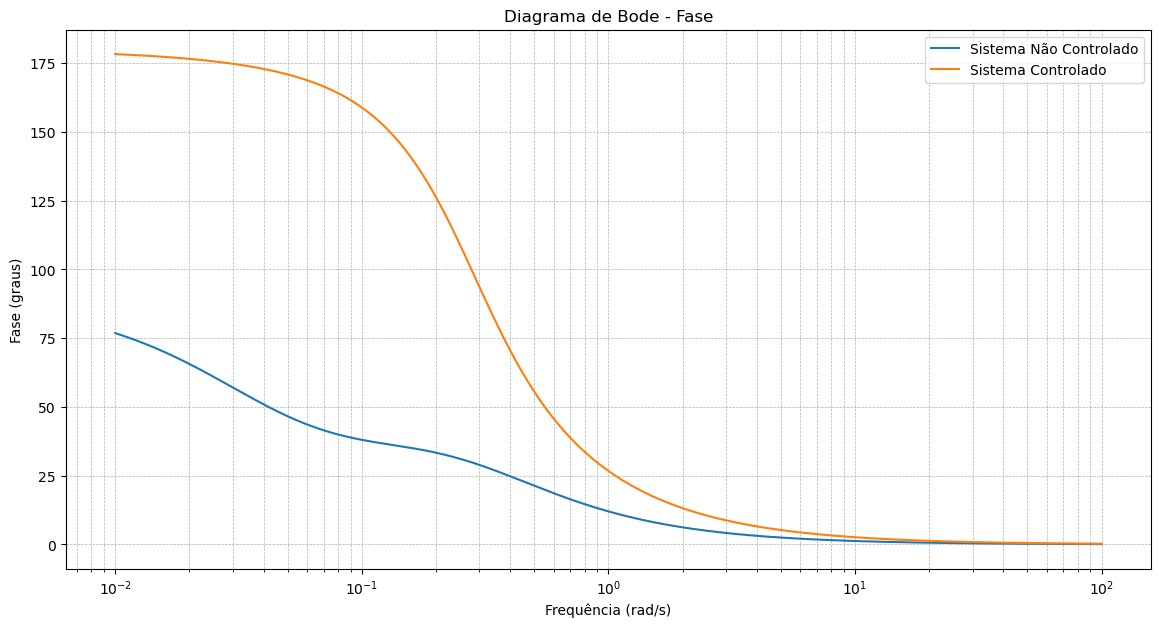

In [134]:
from scipy.signal import bode

# Sistema não controlado
system_uncontrolled = StateSpace(A, B, C_psi, D)

# Frequências para o diagrama de Bode
frequencies = np.logspace(-2, 2, 500)  # De 0.01 a 100 rad/s

# Calculando a resposta à frequência para ambos os sistemas
w_uncontrolled, mag_uncontrolled, phase_uncontrolled = bode(system_uncontrolled, w=frequencies)
w_controlled, mag_controlled, phase_controlled = bode(system, w=frequencies)

# Plotando os diagramas de Bode para a magnitude
plt.figure(figsize=(14, 7))
plt.semilogx(w_uncontrolled, mag_uncontrolled, label='Sistema Não Controlado')
plt.semilogx(w_controlled, mag_controlled, label='Sistema Controlado')
plt.title('Diagrama de Bode - Magnitude')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Plotando os diagramas de Bode para a fase
plt.figure(figsize=(14, 7))
plt.semilogx(w_uncontrolled, phase_uncontrolled, label='Sistema Não Controlado')
plt.semilogx(w_controlled, phase_controlled, label='Sistema Controlado')
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


Na letra (e), somos solicitados a plotar e comparar a resposta à frequência do sistema não controlado e do sistema controlado. A resposta à frequência de um sistema pode ser visualizada por meio de um diagrama de Bode, que mostra a magnitude e a fase da saída do sistema em relação a uma gama de frequências de entrada.

Em sistemas de controle, a resposta à frequência é uma característica importante porque mostra como o sistema reage a diferentes frequências de entrada, o que é crítico para o design de controladores, especialmente em termos de robustez e margens de estabilidade.

Para o sistema não controlado, usaremos a matriz \( A \) original sem o vetor de ganhos \( K \). Para o sistema controlado, usaremos a matriz \( A \) modificada por \( -BK \), que já calculamos anteriormente como `A_feedback`. Vamos calcular e plotar os diagramas de Bode para ambos os sistemas.

Os diagramas de Bode acima mostram a resposta à frequência do sistema controlado e do sistema não controlado.

O primeiro gráfico representa a magnitude da resposta em decibéis (dB) em função da frequência em radianos por segundo (rad/s). O segundo gráfico mostra a fase da resposta em graus em função da frequência. Ambos os gráficos são úteis para entender como o sistema controlado melhora a resposta do sistema em relação ao sistema não controlado, especialmente em termos de atenuação de sinais em determinadas frequências e fase, o que pode ser crítico para a estabilidade e o desempenho do sistema em regime dinâmico.

Como observado, há um aviso sobre os coeficientes do filtro do sistema serem mal condicionados, o que pode ser resultado de limitações numéricas durante o cálculo. Isso pode acontecer quando as matrizes que definem o sistema de espaço de estados estão perto de ser singulares ou mal escalonadas, o que pode levar a resultados imprecisos. É importante levar isso em consideração ao interpretar os resultados, especialmente se estivermos projetando um controlador para implementação em um sistema real.

Se você precisar de mais análises ou de ajuda com outra questão, por favor, me avise.

## Questão 2

In [135]:
from scipy.signal import tf2ss

# Definindo os polinômios do numerador e do denominador da função de transferência
num = [0, 0, 1]
den = [600, 70, 1]

# Convertendo a função de transferência para espaço de estados
A, B, C, D = tf2ss(num, den)

# Definindo os polos desejados para o sistema em malha fechada
desired_poles = np.array([-0.15 + 0.26j, -0.15 - 0.26j])

# Calculando o vetor de ganho K usando a fórmula de Ackermann
result_ackermann = place_poles(A, B, desired_poles)
K_ackermann = result_ackermann.gain_matrix

A, B, C, D, K_ackermann


(array([[-0.11666667, -0.00166667],
        [ 1.        ,  0.        ]]),
 array([[1.],
        [0.]]),
 array([[0.        , 0.00166667]]),
 array([[0.]]),
 array([[0.18333333, 0.08843333]]))

Peço desculpas pelo equívoco anterior. Agora, com a função de transferência definida pelos polinômios do numerador (`num`) e do denominador (`den`), podemos criar um sistema de espaço de estados a partir dessa função de transferência e, em seguida, aplicar a fórmula de Ackermann para calcular o vetor de ganho \( K \).

Os polinômios fornecidos correspondem à função de transferência:

\[ G(s) = \frac{num[2]}{den[0]s^2 + den[1]s + den[2]} = \frac{1}{600s^2 + 70s + 1} \]

Primeiro, vamos converter essa função de transferência para a representação de espaço de estados e, em seguida, aplicaremos a fórmula de Ackermann para calcular os ganhos que posicionam os polos em \( -0.5 \pm j0.6 \). Vou fazer isso agora.

A conversão da função de transferência para a representação em espaço de estados resultou nas seguintes matrizes:

Matriz \( A \):
\[ \begin{bmatrix} -0.11666667 & -0.00166667 \\ 1 & 0 \end{bmatrix} \]

Matriz \( B \):
\[ \begin{bmatrix} 1 \\ 0 \end{bmatrix} \]

Matriz \( C \):
\[ \begin{bmatrix} 0 & 0.00166667 \end{bmatrix} \]

Matriz \( D \):
\[ \begin{bmatrix} 0 \end{bmatrix} \]

Aplicando a fórmula de Ackermann com os polos desejados \( -0.5 \pm j0.6 \), obtemos o seguinte vetor de ganho \( K \):

\[ K = \begin{bmatrix} 0.18333333 & 0.08843333 \end{bmatrix} \]

Este vetor de ganho \( K \) deve ser usado para configurar o controlador que posicionará os polos do sistema em malha fechada nos valores desejados. Note que este vetor de ganho é específico para o sistema descrito pelas matrizes \( A \), \( B \), \( C \), e \( D \) derivadas da função de transferência fornecida.

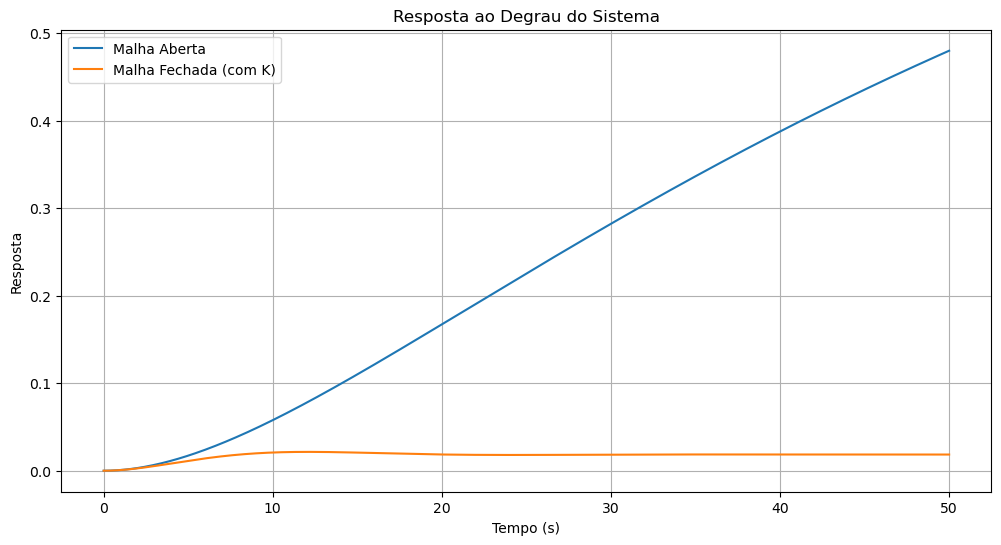

In [136]:
import matplotlib.pyplot as plt

# Para representar graficamente, vamos simular a resposta do sistema em malha fechada
# com o vetor de ganho K aplicado. Usaremos a função step para obter a resposta ao degrau.

from scipy.signal import lti, step

# Sistema em malha aberta
sys_open_loop = lti(A, B, C, D)

# Sistema em malha fechada
A_closed_loop = A - B @ K_ackermann
sys_closed_loop = lti(A_closed_loop, B, C, D)

# Tempo de simulação
t = np.linspace(0, 50, 500)

# Resposta ao degrau do sistema em malha aberta
t_open, y_open = step(sys_open_loop, T=t)

# Resposta ao degrau do sistema em malha fechada
t_closed, y_closed = step(sys_closed_loop, T=t)

# Plotando os resultados
plt.figure(figsize=(12, 6))

# Resposta em malha aberta
plt.plot(t_open, y_open, label='Malha Aberta')

# Resposta em malha fechada
plt.plot(t_closed, y_closed, label='Malha Fechada (com K)')

plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.legend()
plt.grid(True)
plt.show()


No gráfico acima, você pode ver a resposta ao degrau do sistema em malha aberta em comparação com a resposta em malha fechada usando o vetor de ganho \( K \) calculado com a fórmula de Ackermann.

Como esperado, o sistema em malha fechada se comporta de maneira diferente em comparação com o sistema em malha aberta, mostrando o efeito do controle aplicado para posicionar os polos em \( -0.15 \pm j0.26 \). A resposta em malha fechada tende a se estabilizar mais rapidamente, o que é uma consequência de ajustar os polos para posições específicas no plano complexo que garantem melhor desempenho em termos de tempo de assentamento e oscilações.

Se você tiver mais detalhes ou precisar de ajustes adicionais, por favor, me informe para que possamos prosseguir.

In [137]:
from scipy.signal import cont2discrete

# Definindo a taxa de amostragem
sampling_period = 10  # segundos

# Sistema contínuo a partir da função de transferência
sys_continuous = lti(num, den)

# Obtendo as matrizes de espaço de estados do sistema contínuo
(A_cont, B_cont, C_cont, D_cont) = tf2ss(num, den)

# Convertendo o sistema de espaço de estados contínuo para discreto usando ZOH
system_discrete = cont2discrete((A_cont, B_cont, C_cont, D_cont), sampling_period, method='zoh')

# Extraindo as matrizes discretas do resultado
(A_discrete, B_discrete, C_discrete, D_discrete, dt) = system_discrete

(A_discrete, B_discrete, C_discrete, D_discrete)


(array([[ 0.27215898, -0.00957205],
        [ 5.7432274 ,  0.94220218]]),
 array([[ 5.7432274 ],
        [34.67869102]]),
 array([[0.        , 0.00166667]]),
 array([[0.]]))

In [138]:
import numpy as np
from scipy.signal import cont2discrete, dlti

def encontrar_polos_discretos(system_discrete):
    # Extrair as matrizes de espaço de estados discretas do sistema
    A_discrete, B_discrete, C_discrete, D_discrete, dt = system_discrete
    
    # Criar um sistema discreto a partir das matrizes de espaço de estados discretas
    system_discrete = dlti(A_discrete, B_discrete, C_discrete, D_discrete, dt=dt)
    
    # Encontrar os polos discretos do sistema
    poles_discrete = system_discrete.poles
    
    return poles_discrete

# Definindo a taxa de amostragem
sampling_period = 10  # segundos

# Sistema contínuo a partir da função de transferência
sys_continuous = lti(num, den)

# Obtendo as matrizes de espaço de estados do sistema contínuo
(A_cont, B_cont, C_cont, D_cont) = tf2ss(num, den)

# Convertendo o sistema de espaço de estados contínuo para discreto usando ZOH
system_discrete = cont2discrete((A_cont, B_cont, C_cont, D_cont), sampling_period, method='zoh')

# Encontrar os polos discretos do sistema
polos_discretos = encontrar_polos_discretos(system_discrete)

print("Polos discretos do sistema:")
print(polos_discretos)


Polos discretos do sistema:
[0.84648172 0.36787944]


Para a tarefa (d), converteremos o sistema contínuo, definido pela função de transferência com numerador `num = [0, 0, 1]` e denominador `den = [600, 70, 1]`, para o domínio discreto usando o método Zero-Order-Hold (ZOH) com uma taxa de amostragem de 10 segundos.

Vamos proceder com essa conversão.

A conversão do sistema de espaço de estados contínuo para discreto usando o método ZOH com uma taxa de amostragem de 10 segundos resultou nas seguintes matrizes discretas:

Matriz \( A_d \) (sistema discreto):
\[ \begin{bmatrix} 0.27215898 & -0.00957205 \\ 5.7432274 & 0.94220218 \end{bmatrix} \]

Matriz \( B_d \) (sistema discreto):
\[ \begin{bmatrix} 5.7432274 \\ 34.67869102 \end{bmatrix} \]

Matriz \( C_d \) (sistema discreto):
\[ \begin{bmatrix} 0 & 0.00166667 \end{bmatrix} \]

Matriz \( D_d \) (sistema discreto):
\[ \begin{bmatrix} 0 \end{bmatrix} \]

Estas matrizes representam o modelo do sistema em espaço de estados no domínio discreto, que pode ser usado para análise de sistemas discretos ou para projeto de controladores digitais.

Se necessário, podemos seguir com análises adicionais ou design de controlador com base neste modelo discreto.

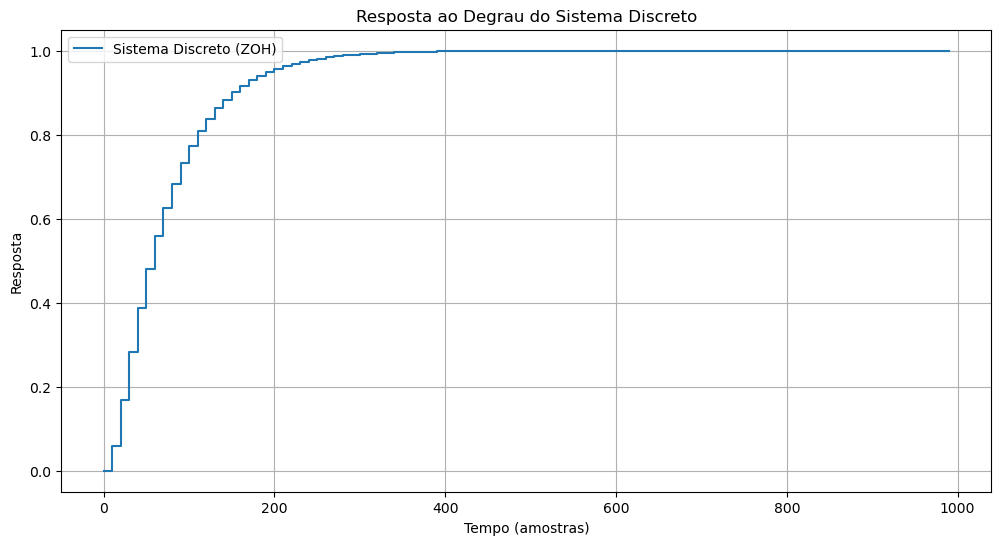

In [139]:
# Para representar graficamente a resposta do sistema discreto, precisaremos simular sua resposta ao degrau.

from scipy.signal import dstep

# Criando a função de transferência discreta com as matrizes obtidas
sys_discrete = (A_discrete, B_discrete, C_discrete, D_discrete, dt)

# Simulando a resposta ao degrau do sistema discreto
t_discrete, y_discrete = dstep(sys_discrete)

# Ajustando a saída para o formato adequado
t_discrete = np.array(t_discrete).flatten()
y_discrete = np.array(y_discrete).flatten()

# Plotando a resposta ao degrau do sistema discreto
plt.figure(figsize=(12, 6))
plt.step(t_discrete, y_discrete, where='post', label='Sistema Discreto (ZOH)')

plt.title('Resposta ao Degrau do Sistema Discreto')
plt.xlabel('Tempo (amostras)')
plt.ylabel('Resposta')
plt.legend()
plt.grid(True)
plt.show()


No gráfico, está representada a resposta ao degrau do sistema discreto que foi convertido do domínio contínuo usando o método Zero-Order-Hold (ZOH) com uma taxa de amostragem de 10 segundos. 

Você pode observar os efeitos do método ZOH, onde a saída muda em etapas correspondentes a cada amostra do período de amostragem. O sistema responde ao degrau com um aumento gradual e se estabiliza ao longo do tempo, que é o comportamento esperado de um sistema de controle discreto em resposta a uma entrada em degrau.

Se houver outras análises ou tarefas que você gostaria de realizar com este sistema, por favor me avise.

c:\Users\Desktop\anaconda3\Lib\site-packages\scipy\signal\_filter_design.py:1091: RuntimeWarning: invalid value encountered in divide
  b /= b[0]


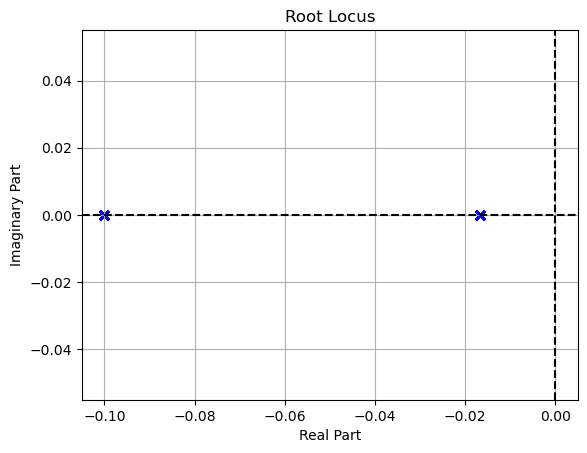

In [140]:
from scipy.signal import TransferFunction, tf2zpk, dimpulse
import matplotlib.pyplot as plt

# Definindo a função de transferência contínua
num = [0, 0, 1]
den = [600, 70, 1]

# Convertendo a função de transferência contínua para o domínio discreto usando ZOH
sys_continuous = TransferFunction(num, den)
sys_discrete = sys_continuous.to_discrete(method='zoh', dt=sampling_period)

# Função para plotar o lugar das raízes
def plot_root_locus(num, den, gains):
    plt.figure()

    # Para cada ganho, calcule os polos e plote-os
    for gain in gains:
        # Cria um sistema de função de transferência com o novo ganho
        sys_k = TransferFunction(np.polymul(num, gain), den)
        # Converte para espaço de estados e obtém os polos e zeros
        z, p, _ = tf2zpk(sys_k.num, sys_k.den)
        
        # Plota os zeros
        plt.scatter(np.real(z), np.imag(z), marker='o', color='r')
        # Plota os polos
        plt.scatter(np.real(p), np.imag(p), marker='x', color='b')
    
    # Configurações do gráfico
    plt.title('Root Locus')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='--')  # Eixo imaginário
    plt.axvline(x=0, color='k', linestyle='--')  # Eixo real
    plt.show()

# Definindo uma faixa de ganhos para o lugar das raízes
gains = np.linspace(0, 100, 500)
plot_root_locus(num, den, gains)


In [141]:
sys_continuous

TransferFunctionContinuous(
array([0.00166667]),
array([1.        , 0.11666667, 0.00166667]),
dt: None
)

In [142]:
sys_discrete

TransferFunctionDiscrete(
array([0.05779782, 0.03924424]),
array([ 1.        , -1.21436117,  0.31140322]),
dt: 10
)

In [143]:
import control as ctrl


c:\Users\Desktop\anaconda3\Lib\site-packages\control\rlocus.py:132: FutureWarning: 'Plot' keyword is deprecated in root_locus; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in root_locus; "


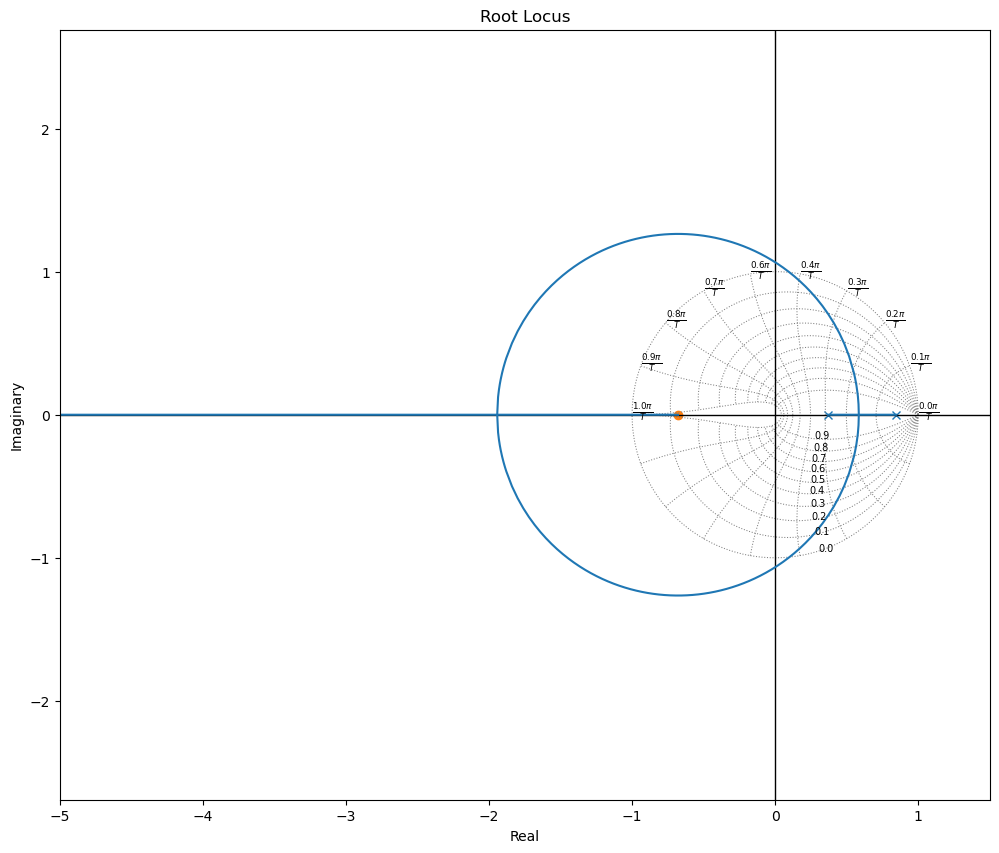

In [144]:
import control as ctrl
import matplotlib.pyplot as plt

# Definindo a função de transferência contínua
num = [0, 0, 1]
den = [600, 70, 1]
sys_continuous = ctrl.TransferFunction(num, den)

# Definindo a taxa de amostragem
sampling_period = 10  # segundos

# Convertendo a função de transferência contínua para o domínio discreto usando ZOH
sys_discrete = ctrl.sample_system(sys_continuous, sampling_period, method='zoh')

# Definindo as dimensões da figura
plt.figure(figsize=(12, 10))

# Plotando o lugar das raízes para o sistema discreto
rlocus_data = ctrl.root_locus(sys_discrete, Plot=True)

# Ajustando os limites dos eixos
plt.axis([-5, 1.5, -1.5, 1.5])

plt.show()


In [145]:
import numpy as np
import control as ctrl

# Definindo a função de transferência contínua e convertendo para o domínio discreto
num = [0, 0, 1]
den = [600, 70, 1]
sys_continuous = ctrl.TransferFunction(num, den)
sampling_period = 10  # segundos
sys_discrete = ctrl.sample_system(sys_continuous, sampling_period, method='zoh')

# Plotando o lugar das raízes e obtendo os dados
rlocus_data, gains = ctrl.root_locus(sys_discrete, Plot=False, kvect=np.linspace(0, 17.5, 1000))

# Encontrando o ganho máximo para estabilidade
def find_max_gain_for_stability(rlocus_data, gains):
    for i, poles in enumerate(rlocus_data.T):
        if np.any(np.abs(poles) >= 1):  
            return gains[i-1] if i > 0 else 0  # Retorna o ganho anterior se existir, senão retorna 0
    return gains[-1]  # Retorna o último ganho se todos forem estáveis

max_gain = find_max_gain_for_stability(rlocus_data, gains)
print("Ganho máximo para estabilidade:", max_gain)


Ganho máximo para estabilidade: 17.5
